# Packages

In [1]:
# Diagnostic & memory management
import time # for performance checks
import datetime # for log
from datetime import timedelta
import psutil # for memory checks
from psutil._common import bytes2human
import gc # garbage collector - clean up memory

# Data analysis
import pandas as pd
import geopandas as gpd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data paths

In [2]:
# General Paths
preppedDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/prepped_data/'
rawDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/raw/'
output_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/'
interimFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/intermediate_files/'
workFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/work files/'

In [3]:
AOI_path = preppedDat_path+'Study_area_basedOn_UK_BFC_EPSG27700.gpkg' # Study area

## From SDS2 CW2  
Could be used for dual-axis plot of land impact VS energy prod

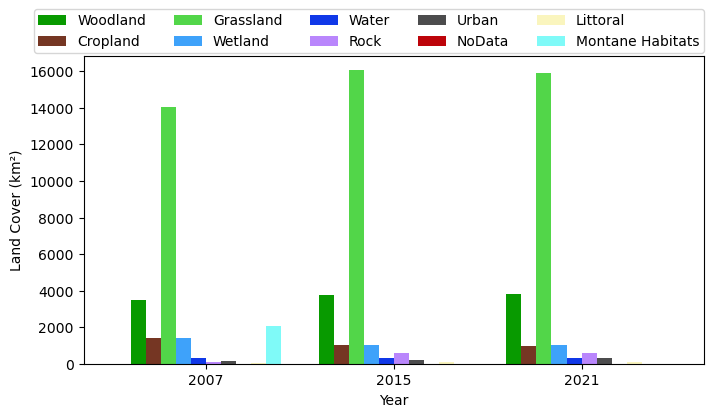

In [9]:
# Total cover plot
fig,ax=plt.subplots(figsize=(8,4))
zs_tot.loc[zs_tot['NPARK21NM']=='TOTAL','Year':].plot.bar(ax=ax, x='Year', width=0.8, color=('#089a00','#753623','#52d649','#3ea2fa','#1038e8','#b986fc','#4c4c4d','#bd040a','#faf5be','#7ffaf8'))
plt.legend(bbox_to_anchor=(0.46, 1.08), loc='center', borderpad=0.3, ncol=5)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Land Cover (km²)')
plt.savefig('images/total_landcover_per_class.png',dpi=300, bbox_inches='tight')
plt.show()

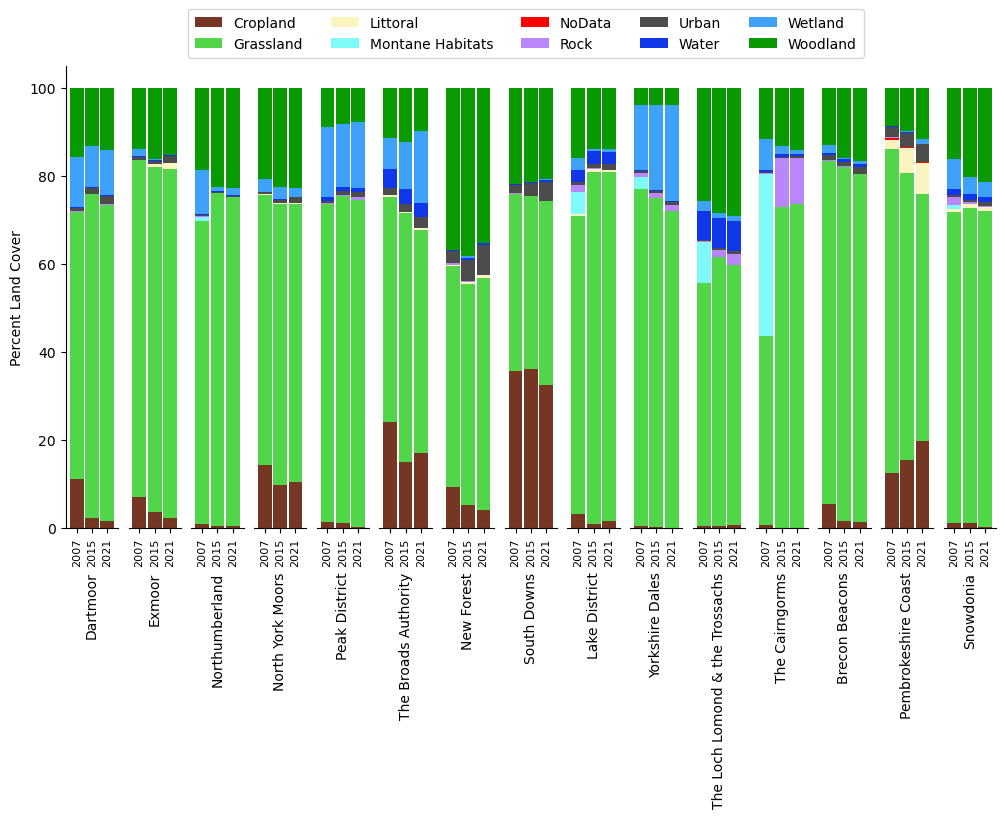

In [74]:
# Better visual display by using many plots at park level
fig, ax = plt.subplots(1,15,figsize = (12,6))
for i,j in zip(melted['Park short name'].unique(),range(len(melted['Park short name'].unique()))):
    sub = melted[melted['Park short name']==i]
    sub.rename(columns={'Year':i}, inplace=True)
    sub= sub.set_index([i,'Cover']).Percent
    sub.unstack().plot(ax=ax[j], kind='bar', stacked=True, width=0.9, legend=False,
                        color=('#753623','#52d649','#faf5be','#7ffaf8','red','#b986fc','#4c4c4d','#1038e8','#3ea2fa','#089a00'))
    #plt.xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].set_xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].tick_params(axis='x',labelsize=8)
    if j==0:
        ax[j].spines[['right', 'top']].set_visible(False)
        ax[j].set_ylabel('Percent Land Cover')
    else:
        ax[j].spines[['left','right', 'top']].set_visible(False)
        ax[j].get_yaxis().set_visible(False)

plt.legend(bbox_to_anchor=(-8, 1.07), loc='center', borderpad=0.5, ncol=5)
plt.savefig('images/landcover_percent.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Land stats charts

In [86]:
# Agri stats df
stats_df = pd.read_excel(f'{output_path}stats/Scenario1_all_Agri_Summary_stats.xlsx')
stats_dfT = stats_df.set_index('Unnamed: 0')
stats_dfT = stats_dfT.T # transpose for plotting
stats_dfT.rename({'Solar Area (km²)':'S1','Total Area (km²)(calc from patch stats)':'S2', 'Total footprint (km²)':'S3'}, inplace=True)
stats_dfT

Unnamed: 0,ALC 4,0,ALC 5
km2,31040.057800,703305.232200,70669.558000
S1,239.992400,62.802600,51.721800
Solar Area (% of category area),0.773170,0.008930,0.073188
Wind Area (km²),0.362700,0.286500,94.344400
Wind Footprint (km²),0.008100,NaN,1.994291
Wind Area (% of category area),0.001168,0.000041,0.133501
Wind Footprint (% of category area),0.000026,NaN,0.002822
Overlap Area (km²),0.000000,0.000000,0.222700
Overlap Area (% of category area),0.000000,0.000000,0.000315
S2,240.355100,63.089100,146.288900


In [69]:
# Energy df
ener_df = pd.read_excel(f'{output_path}stats/Energy scenarii comparison.xlsx')
ener_df.set_index('Scenario', inplace = True)
ener_df.rename({'1 area threshold':'S1', '2 area threshold':'S2', '3 area threshold':'S3'}, inplace=True)
ener_df

,Solar area (km²),Solar area (% of GB),"Solar Annual production, solar only (TWh) (PVOUT)","Solar Energy density, solar only (GWh/km²) (PVOUT)","Solar Annual production, solar only (TWh) (equation)","Solar Energy density, solar only (GWh/km²) (equation)","Solar Total Capacity, solar only (GW)","Solar Capacity density, solar only (MW/km²)",Wind area (km²),Wind footprint (wind patches only) (km²) (Denholm),...,% difference all-thresh,Total area (% of GB),"Total Solar Production, co-location (TWh) (PVOUT)","Total Wind Production, co-location (TWh)","Total Solar Production, NO co-location (TWh) (PVOUT)","Total Wind Production, NO co-location (TWh)","Total Production, co-location (TWh)",% difference all-thresh.1,"Total Production, NO co-location (TWh)",% difference all-thresh.2
Scenario,,,,,,,,,,,,,,,,,,,,,
1 all patches,354.5168,0.154043,18.077757,50.992667,39.669618,111.897711,17.725840,50.0,94.9936,2.008101,...,NaN,0.195415,18.088552,1.948935,18.088661,1.943453,20.037487,NaN,20.032114,NaN
S1,340.2999,0.147865,17.354713,50.998291,38.079609,111.900146,17.014995,50.0,82.3409,1.742702,...,5.974988,0.183739,17.365415,1.693668,17.365524,1.688234,19.059084,4.882863,19.053757,4.883942
2 all patches,36760.8920,15.973135,1800.631413,48.982256,3927.583933,106.841366,1838.044600,50.0,6190.2014,132.849394,...,NaN,18.870016,1822.310850,140.867091,1822.529834,130.894452,1963.177941,NaN,1953.424286,NaN
S2,36094.7855,15.683702,1768.405266,48.993372,3856.942691,106.855953,1804.739275,50.0,6029.8782,129.459005,...,1.965962,18.499039,1788.840800,136.976266,1789.047220,127.561090,1925.817066,1.903081,1916.608309,1.884689
3 all patches,29906.2192,12.994681,1465.419249,49.000485,3196.161885,106.872817,1495.310960,50.0,1126.4017,23.667954,...,NaN,13.593951,1476.977721,27.849408,1477.094473,22.687190,1504.827129,NaN,1499.781663,NaN
S3,29395.6756,12.772843,1440.643212,49.008678,3141.864333,106.881855,1469.783780,50.0,1098.8128,23.101154,...,1.753931,13.355523,1451.721725,27.097799,1451.833629,22.151697,1478.819524,1.728279,1473.985326,1.720006
4 all patches,5047.0247,2.193005,247.587081,49.056047,541.756541,107.341765,252.351235,50.0,1315.3172,27.530841,...,NaN,2.796584,251.032461,28.023202,251.067263,26.406256,279.055663,NaN,277.473519,NaN
4 area threshold,4810.5856,2.090268,235.976846,49.053663,516.274901,107.320593,240.529280,50.0,1279.2158,26.786335,...,4.272537,2.677099,239.308232,27.264043,239.341883,25.697605,266.572275,4.473440,265.039488,4.481160
5 all patches,2305.2699,1.001673,116.936744,50.725836,257.149290,111.548453,115.263495,50.0,10934.3352,211.085643,...,NaN,5.972755,142.077162,208.472324,142.331106,198.723580,350.549486,NaN,341.054686,NaN


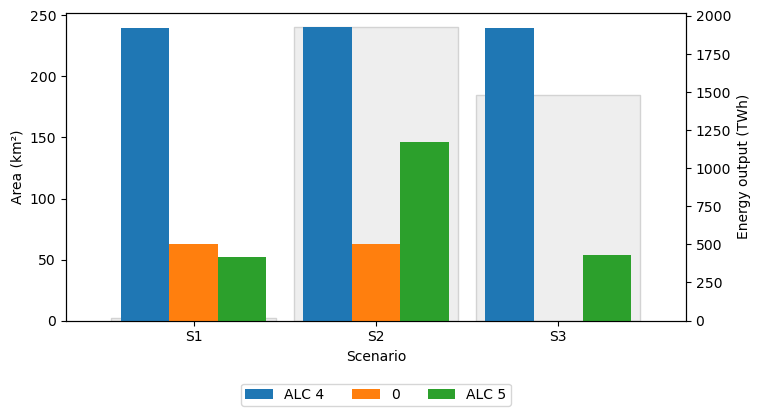

In [87]:
# Agri stats
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
stats_dfT.loc[['S1','S2', 'S3']].plot.bar(ax=ax1, width=0.8)
ener_df.loc[['S1','S2', 'S3'],'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.set_ylabel('Area (km²)')
ax.set_ylabel('Energy output (TWh)')
#plt.savefig('images/total_landcover_per_class.png',dpi=300, bbox_inches='tight')

plt.show()

In [15]:
# Agri stats df
stats_df = pd.read_excel(f'{output_path}stats/Comparison Agri stats.xlsx')
stats_dfT = stats_df.set_index('Unnamed: 0')
stats_dfT = stats_dfT.T # transpose for plotting
stats_dfT

Unnamed: 0,0,ALC 3,ALC 4,ALC 5,Scenario
S1_km2,703305.2322,NaN,31040.0578,70669.558,S1
S1_Solar Area (km²),62.8026,NaN,239.9924,51.7218,S1
S1_Solar Area (% of category area),0.00893,NaN,0.77317,0.073188,S1
S1_Wind Area (km²),0.2865,NaN,0.3627,94.3444,S1
S1_Wind Footprint (km²),NaN,NaN,0.0081,1.994291,S1
...,...,...,...,...,...
S7_thr_Overlap Area (% of category area),0.001505,0,1.540947,0.192125,S7 thr
S7_thr_Total Area (km²)(calc from patch stats),565.4719,5209.3691,3957.7945,1968.7729,S7 thr
S7_thr_Total Area (% of category area),0.080402,6.477122,12.750603,2.785885,S7 thr
S7_thr_Total footprint (km²),NaN,95.991784,2303.801952,408.61675,S7 thr


In [5]:
# Energy df
ener_df = pd.read_excel(f'{output_path}stats/Comparison Energy scenarii.xlsx')
ener_df.set_index('Scenario', inplace = True)
ener_df

,Unnamed: 0,Solar area (km²),Solar area (% of GB),"Solar Annual production, solar only (TWh) (PVOUT)","Solar Energy density, solar only (GWh/km²) (PVOUT)","Solar Annual production, solar only (TWh) (equation)","Solar Energy density, solar only (GWh/km²) (equation)","Solar Total Capacity, solar only (GW)","Solar Capacity density, solar only (MW/km²)",Wind area (km²),...,"Overlap Annual production, co-location (TWh)","Overlap Annual production, NO co-location (TWh)",Total area (km²),Total area (% of GB),"Total Solar Production, co-location (TWh) (PVOUT)","Total Wind Production, co-location (TWh)","Total Solar Production, NO co-location (TWh) (PVOUT)","Total Wind Production, NO co-location (TWh)","Total Production, co-location (TWh)","Total Production, NO co-location (TWh)"
Scenario,,,,,,,,,,,,,,,,,,,,,
S1,0,354.5168,0.154043,18.077757,50.992667,39.669618,111.897711,17.725840,50.0,94.9936,...,0.016277,0.010904,449.7331,0.195415,18.088552,1.948935,18.088661,1.943453,20.037487,20.032114
S1 thr,0,340.2999,0.147865,17.354713,50.998291,38.079609,111.900146,17.014995,50.0,82.3409,...,0.016137,0.010810,422.8616,0.183739,17.365415,1.693668,17.365524,1.688234,19.059084,19.053757
S2,0,36760.8920,15.973135,1800.631413,48.982256,3927.583933,106.841366,1838.044600,50.0,6190.2014,...,31.651612,21.898421,43427.8325,18.870016,1822.310850,140.867091,1822.529834,130.894452,1963.177941,1953.424286
S2 thr,0,36094.7855,15.683702,1768.405266,48.993372,3856.942691,106.855953,1804.739275,50.0,6029.8782,...,29.850711,20.641954,42574.0579,18.499039,1788.840800,136.976266,1789.047220,127.561090,1925.817066,1916.608309
S3,0,29906.2192,12.994681,1465.419249,49.000485,3196.161885,106.872817,1495.310960,50.0,1126.4017,...,16.720489,11.675224,31285.3909,13.593951,1476.977721,27.849408,1477.094473,22.687190,1504.827129,1499.781663
S3 thr,0,29395.6756,12.772843,1440.643212,49.008678,3141.864333,106.881855,1469.783780,50.0,1098.8128,...,16.024616,11.190418,30736.6667,13.355523,1451.721725,27.097799,1451.833629,22.151697,1478.819524,1473.985326
S4,0,5047.0247,2.193005,247.587081,49.056047,541.756541,107.341765,252.351235,50.0,1315.3172,...,5.062326,3.480182,6436.1151,2.796584,251.032461,28.023202,251.067263,26.406256,279.055663,277.473519
S4 thr,0,4810.5856,2.090268,235.976846,49.053663,516.274901,107.320593,240.529280,50.0,1279.2158,...,4.897824,3.365037,6161.1297,2.677099,239.308232,27.264043,239.341883,25.697605,266.572275,265.039488
S5,0,2305.2699,1.001673,116.936744,50.725836,257.149290,111.548453,115.263495,50.0,10934.3352,...,34.889162,25.394362,13745.8183,5.972755,142.077162,208.472324,142.331106,198.723580,350.549486,341.054686


In [12]:
cols_leftY = []
for i in range(1,8):
    cols_leftY.append(f'S{i}_thr_Total Area (km²)(calc from patch stats)')
cols_leftY

['S1_thr_Total Area (km²)(calc from patch stats)',
 'S2_thr_Total Area (km²)(calc from patch stats)',
 'S3_thr_Total Area (km²)(calc from patch stats)',
 'S4_thr_Total Area (km²)(calc from patch stats)',
 'S5_thr_Total Area (km²)(calc from patch stats)',
 'S6_thr_Total Area (km²)(calc from patch stats)',
 'S7_thr_Total Area (km²)(calc from patch stats)']

In [13]:
cols_rightY = []
for i in range(1,8):
    cols_rightY.append(f'S{i} thr')
cols_rightY

['S1 thr', 'S2 thr', 'S3 thr', 'S4 thr', 'S5 thr', 'S6 thr', 'S7 thr']

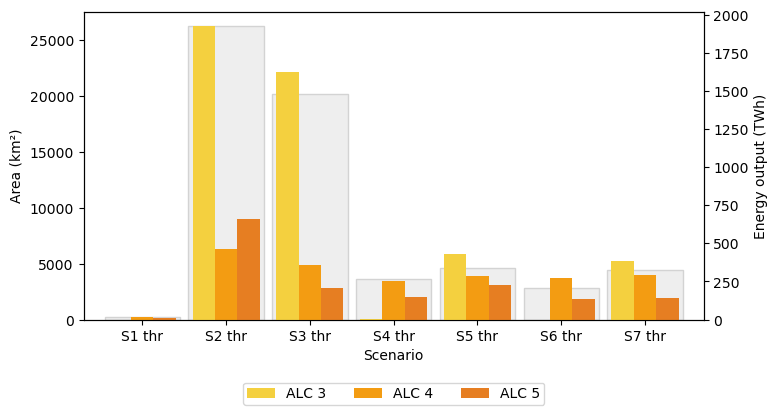

In [19]:
# Agri stats
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
stats_dfT.loc[cols_leftY, ['ALC 3','ALC 4','ALC 5']].plot.bar(ax=ax1, width=0.8, color = ['#f4d03f','#f39c12','#e67e22'])
ener_df.loc[cols_rightY,'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.set_ylabel('Area (km²)')
ax.set_ylabel('Energy output (TWh)')
#plt.savefig('images/total_landcover_per_class.png',dpi=300, bbox_inches='tight')

plt.show()